In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [13]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','JNJ']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','JNJ']

#It is annual data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN,JNJ]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","J&J"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.031403,56007100,APPLE
2023-02-10,149.460007,151.339996,149.220001,151.009995,150.399887,57450700,APPLE
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.228439,62199000,APPLE
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.581055,61707600,APPLE
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.702454,65573800,APPLE
2023-02-16,153.509995,156.330002,153.350006,153.710007,153.089005,68167900,APPLE
2023-02-17,152.350006,153.000000,150.850006,152.550003,151.933685,59144100,APPLE
2023-02-21,150.199997,151.300003,148.410004,148.479996,147.880127,58867200,APPLE
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.308395,51011300,APPLE


In [14]:
df['Date'] = df.index

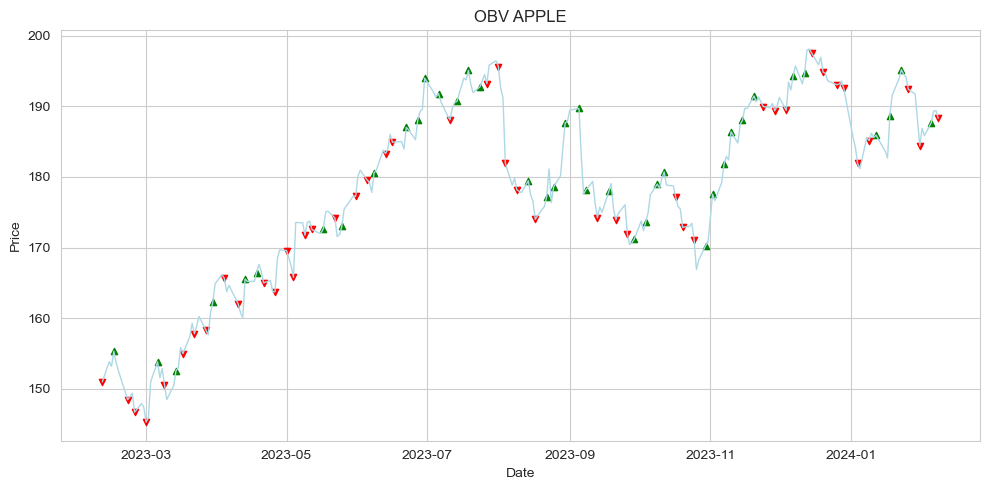

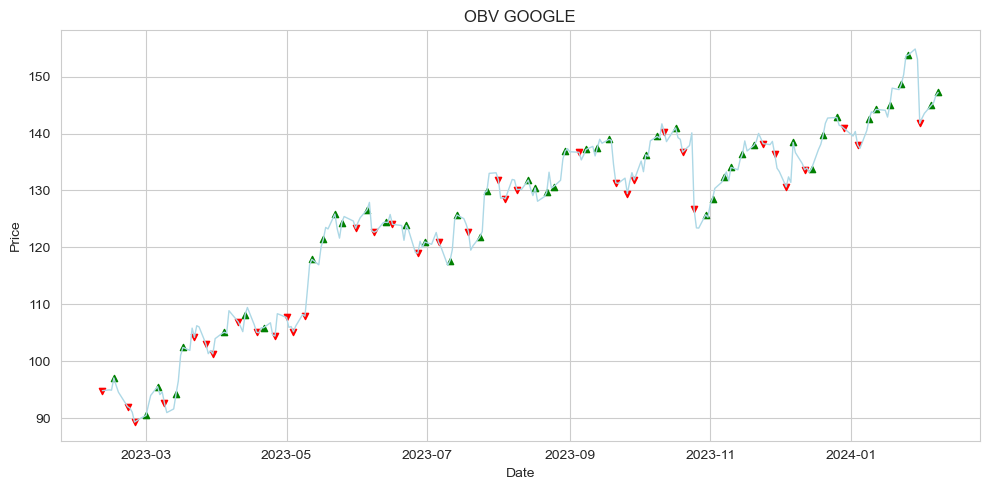

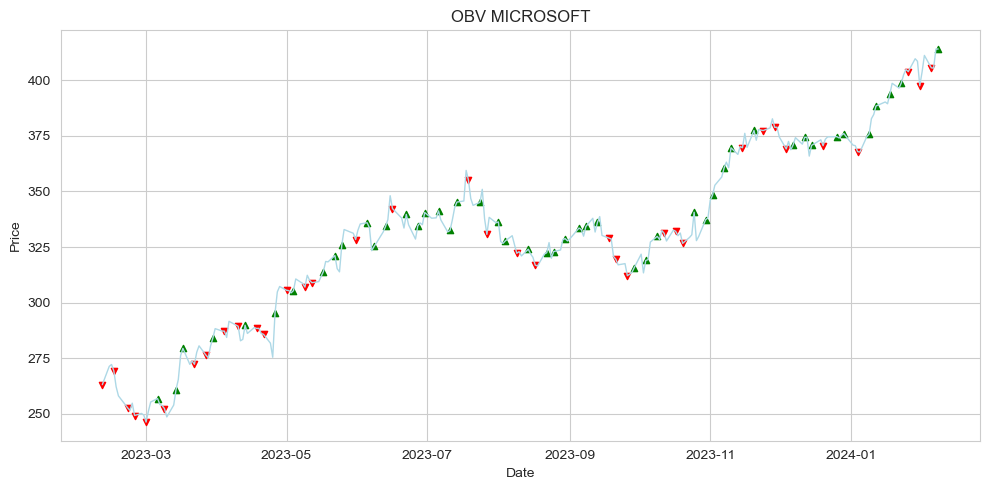

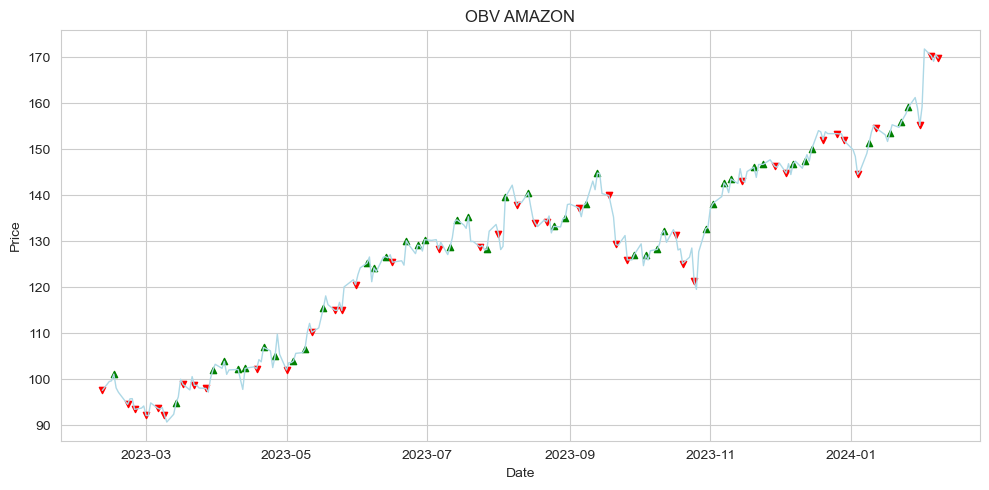

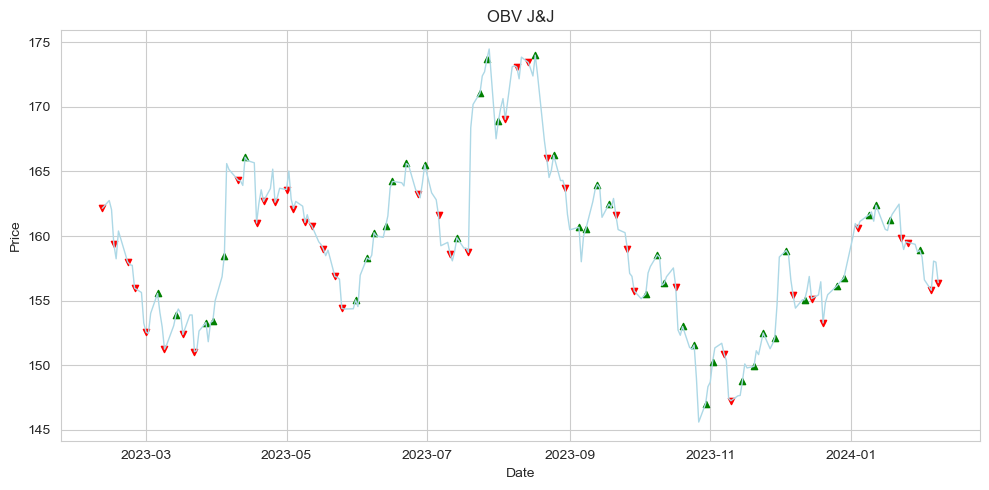

In [42]:

def  cal_obv(df):
    data = pd.DataFrame()
    for company in df['company_name'].unique():
        company_subset = df[df['company_name'] == company].copy()
        #Calculating OBV

        company_subset['variation'] = company_subset['Close'].diff()
        company_subset = company_subset.dropna()

        company_subset['OBV'] = 0
        nele = len(company_subset['variation'])


        pvar = company_subset.columns.get_loc('variation')
        pvol = company_subset.columns.get_loc('Volume')
        pobv = company_subset.columns.get_loc('OBV')

        for i in range(nele):
            daily_change = company_subset.iloc[i,pvar]
            if daily_change > 0:
                volume = company_subset.iloc[i,pvol]
            elif daily_change == 0:
                volume = 0
            elif daily_change < 0:
                volume = -company_subset.iloc[i,pvol]

            if i == 0 :
                company_subset.iloc[i,pobv] = volume
            else:
                company_subset.iloc[i,pobv] = company_subset.iloc[i-1,pobv] + volume


        # calculate signal
                
        company_subset['signal'] = 0
        pclose = company_subset.columns.get_loc('Close')
        pobv = company_subset.columns.get_loc('OBV')
        psignal = company_subset.columns.get_loc('signal')

        for i in range(1,nele):
            current_price = company_subset.iloc[i,pclose]
            previous_price = company_subset.iloc[i-1,pclose]

            current_obv = company_subset.iloc[i,pobv]
            previous_obv = company_subset.iloc[i-1,pobv]


            if current_obv > previous_obv and current_price > previous_price:
                company_subset.iloc[i,psignal] = 1
               
            elif current_obv < previous_obv and current_price <previous_price:
                company_subset.iloc[i,psignal] = 0  

        # company_subset['daily returns'] = company_subset['Close']/company_subset['Close'].iloc[0] * 100 
        # company_subset['cumulative returns'] = (1. + company_subset['daily returns']).cumprod() * 100.
        data = pd.concat([data,company_subset], axis=0,ignore_index=True)

        plt.figure(figsize=(10,5))
        # company_subset['benchmark'] = company_subset['Close'].iloc[0] * 100.
        # company_subset['cumulative returns'].plot()
        #plt.plot(company_subset['Date'],company_subset['OBV'],color ='grey')
        plt.plot(company_subset['Date'],company_subset['Close'],linewidth = 1,color = 'lightblue')
        plt.scatter(company_subset['Date'][::3][company_subset['signal'][::3] == 1],company_subset['Close'][::3][company_subset['signal'][::3] == 1],marker='^',s= 20,color = 'g')
        plt.scatter(company_subset['Date'][::3][company_subset['signal'][::3] == 0],company_subset['Close'][::3][company_subset['signal'][::3] == 0],marker='v',s = 20,color = 'r')
        plt.title(f'OBV {company}')

        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.tight_layout()
        plt.show()



    return data



data = cal_obv(df)

In [35]:
data.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume,company_name,variation,OBV,signal
Date,,,,,,,,,,
2023-02-10,149.460007,151.339996,149.220001,151.009995,150.399887,57450700,APPLE,0.139999,57450700,0
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.228439,62199000,APPLE,2.840012,119649700,1
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.581055,61707600,APPLE,-0.650009,57942100,0
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.702454,65573800,APPLE,2.130005,123515900,1
2023-02-16,153.509995,156.330002,153.350006,153.710007,153.089005,68167900,APPLE,-1.619995,55348000,0
...,...,...,...,...,...,...,...,...,...,...
2024-02-02,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J,-1.750000,-447702800,0
2024-02-05,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J,-0.809998,-456824400,0
2024-02-06,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J,2.259995,-447594500,1
